# Twitter Sentiment Analysis - Fake Covid-19 dataset

We've used the following packages:

In [ ]:
import plotly.express as px
import datetime
from dateutil.parser import parse
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import json
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from nltk.corpus import stopwords
import itertools
import altair as alt
from dateutil.parser import parse
from IPython.core.display import Image, display
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

alt.data_transformers.disable_max_rows()

Then we have defined the following functions to clean the tweets' text:

In [ ]:

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

In order to do the classification of the tweets, we need to read the csv file and the json file:

In [ ]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
data1 = data
data2 = data
data3 = data
data4 = data
data5 = data
data6 = data
data7 = data
data8 = data
data9 = data
data10 = data
data11 = data

## Pie chart

We're interested in the "full_text" field, that it has been cleaned with specific functions.  
We've used **SentimentIntensityAnalyzer** to calculate positive, negative and neutral sentiment scores from the text.

In [ ]:
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
positive_scores = []
neutral_scores = []
negative_scores = []
id_positive = []
id_neutral = []
id_negative = []

index=0
stop_words = stopwords.words('english')

for element in data:
    #data[index]['full_text'] = data[index]['full_text'].lower()                 # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])    # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    #data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    #data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    #data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                  # No amp with space
    #data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])   # Remove hashtags
    #data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])   # No mentions
    #data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    #data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^RT ", " ", data[index]['full_text'])    # No RT
    #data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])  # Remove big spaces
    
    tweet_list.append(data[index]['full_text'])
    #analysis = TextBlob(data[index]['full_text'])
    #print(analysis.sentiment)
    score = SentimentIntensityAnalyzer().polarity_scores(data[index]['full_text'])
    
    #print(data[index]['full_text'])
    #print(score['compound'])
    #print(" ")
    if score['compound']>0.05:
        positive_list.append(data[index]['full_text'])
        positive_scores.append(score['compound'])
        id_positive.append(data[index]['id_str'])
    elif score['compound']<-0.05:
        negative_list.append(data[index]['full_text'])
        negative_scores.append(score['compound'])
        id_negative.append(data[index]['id_str'])
    else:
        neutral_list.append(data[index]['full_text'])
        neutral_scores.append(score['compound'])
        id_neutral.append(data[index]['id_str'])
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.



We've reported the number of tweets (Positive, Negative, Neutral) in a DataFrame in order to visualise them:

In [ ]:
print("Total number of tweets: ",len(tweet_list))
print("Positive number: ",len(positive_list))
print("Negative number: ", len(negative_list))
print("Neutral number: ",len(neutral_list))

category = []
count = []

categorypositive = ["Positive"] * len(positive_list)
categoryneutral = ["Neutral"] * len(neutral_list)
categorynegative = ["Negative"] * len(negative_list)

category = categorypositive + categoryneutral + categorynegative

count = Counter(category)

df_fake = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_fake = df_fake.rename(columns={'index':'Category', 0:'Count'})
print(df_fake)

Then we have created the pie chart:

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
fig_fake1 = px.pie(df_fake, values='Count', names='Category',
             title='Tweets percentage classified by sentiment - Fake Covid-19 dataset')
fig_fake1.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
fig_fake1.show()

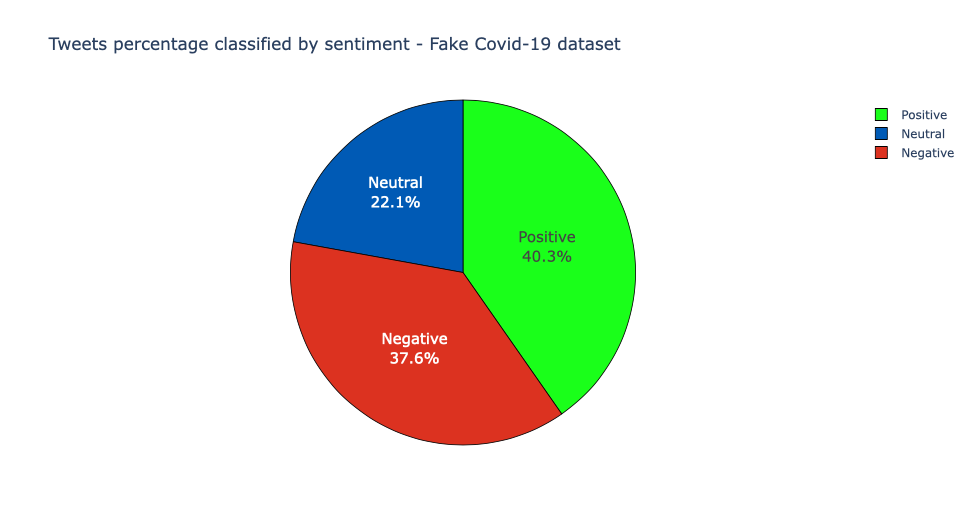

## A few examples...

### An example of a tweet with a positive sentiment score

In [ ]:
ind = positive_scores.index(max(positive_scores))
print("https://twitter.com/anyuser/status/" + id_positive[ind])

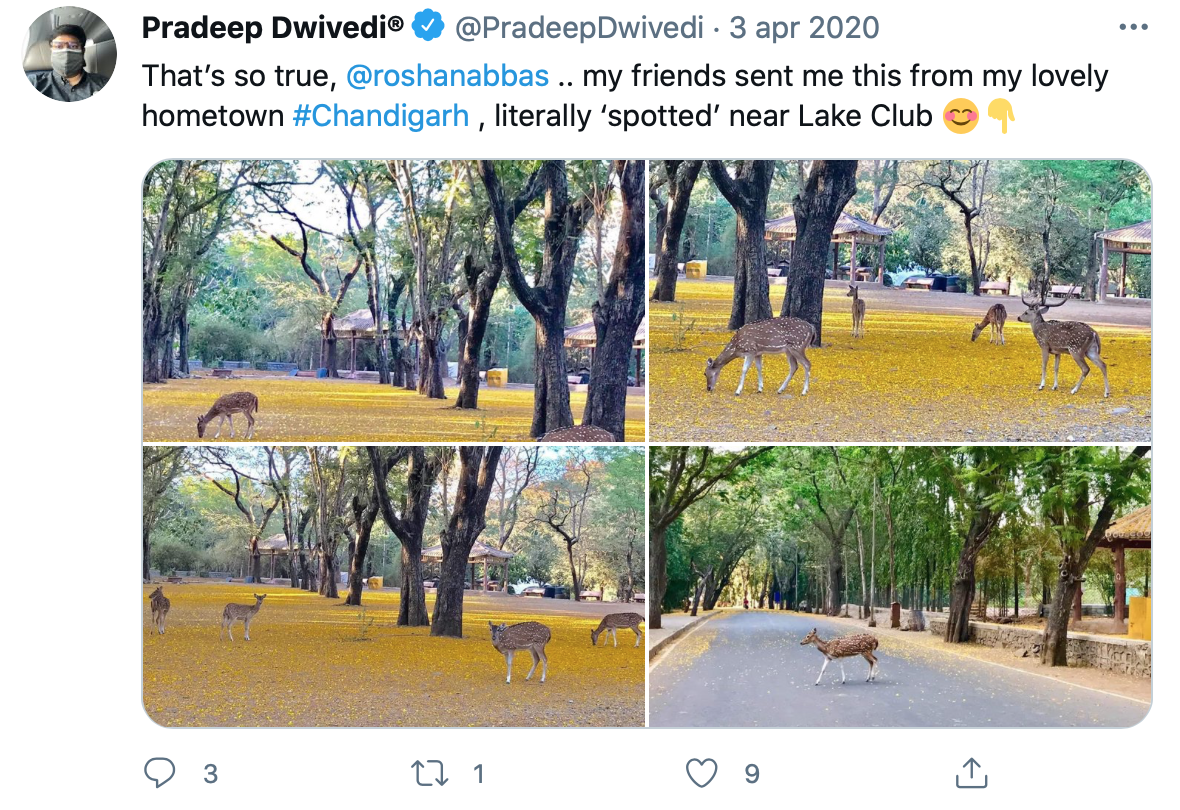

### Why is this tweet fake? https://newschecker.in/english/pictures-of-deer-strolling-on-road-are-not-from-chandigarh-here-s-the-reality

### An example of a tweet with a negative sentiment score

In [ ]:
negative_scores.sort()
print(negative_scores[9])
ind = negative_scores.index(negative_scores[9])
print("https://twitter.com/anyuser/status/" + id_negative[ind])

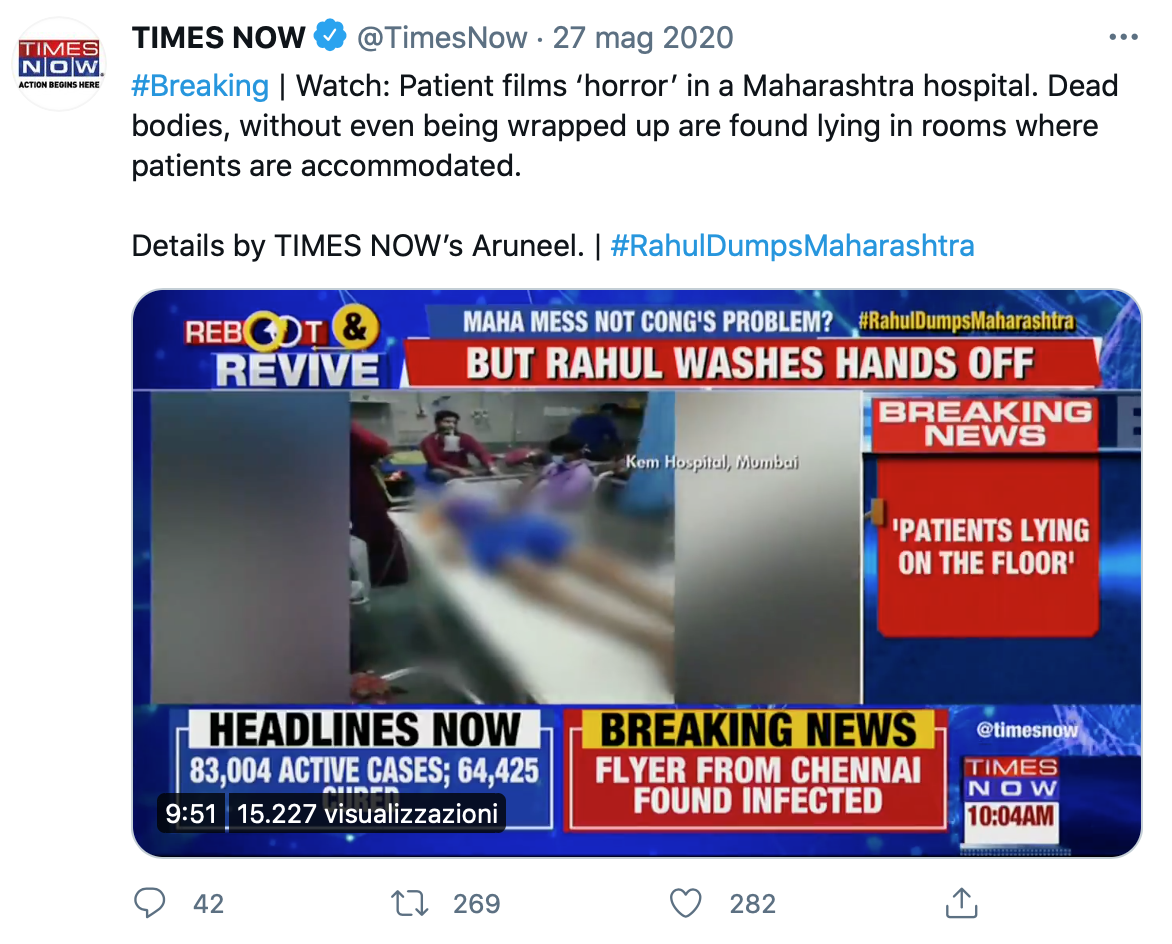

### Why is this tweet fake? https://factly.in/this-video-shows-the-terrible-situation-at-a-hospital-in-mumbai-kem-hospital-not-delhi/

### An example of a tweet with a neutral sentiment score

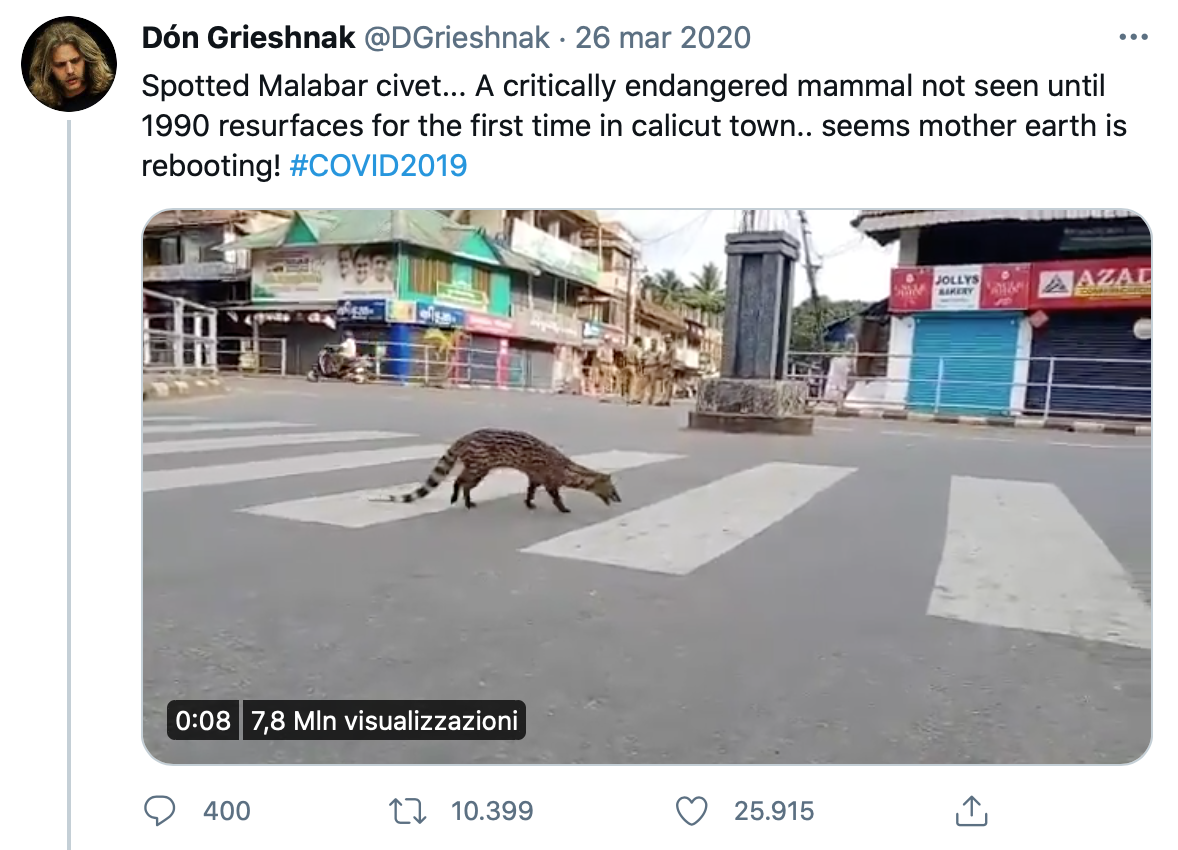

### Why is this tweet fake? https://www.snopes.com/fact-check/spotted-malabar-civet-coronavirus/

### Distribution of sentiment values classified by sentiment category and tweet type (False, Partially False)

In [ ]:
tweet_list = []
scores = []
category = []
sentiment = []

index=0

for element in data1:
    token_id = data1[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    data1[index]['full_text'] = remove_urls(data1[index]['full_text'])
    data1[index]['full_text'] = remove_twitter_urls(data1[index]['full_text'])
    data1[index]['full_text'] = noamp(data1[index]['full_text'])                  # No amp with space
    data1[index]['full_text'] = re.sub("^RT ", " ", data1[index]['full_text'])    # No RT
    
    tweet_list.append(data1[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data1[index]['full_text'])
    
    if lista_unica_csv[indice_csv+1].lower() == "false":
        if score['compound']>0.05:
            scores.append(score['compound'])
            category.append("false")
            sentiment.append("positive")
        elif score['compound']<-0.05:
            scores.append(score['compound'])
            category.append("false")
            sentiment.append("negative")
        else:
            scores.append(score['compound'])
            category.append("false")
            sentiment.append("neutral")
            
    elif lista_unica_csv[indice_csv+1].lower() == "partially false":
        if score['compound']>0.05:
            scores.append(score['compound'])
            category.append("partially false")
            sentiment.append("positive")
        elif score['compound']<-0.05:
            scores.append(score['compound'])
            category.append("partially false")
            sentiment.append("negative")
        else:
            scores.append(score['compound'])
            category.append("partially false")
            sentiment.append("neutral")
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.


df_fake1 = pd.DataFrame(
    {'Scores':scores,
    'Type': category,
     'Sentiment': sentiment
    })

In [ ]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['axes.titlepad'] = 20 

sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

p = sns.stripplot(data=df_fake1,
                    x='Scores',
                    y='Sentiment',
                    hue='Type',
                    jitter=0.30,
                    dodge=True,
                    orient='h',
                    size=6,
                 palette=["#005AB5","#DC3220"]).set_title('Distribution of sentiment scores classified by sentiment category and tweet type (False, Partially False)', weight='bold')

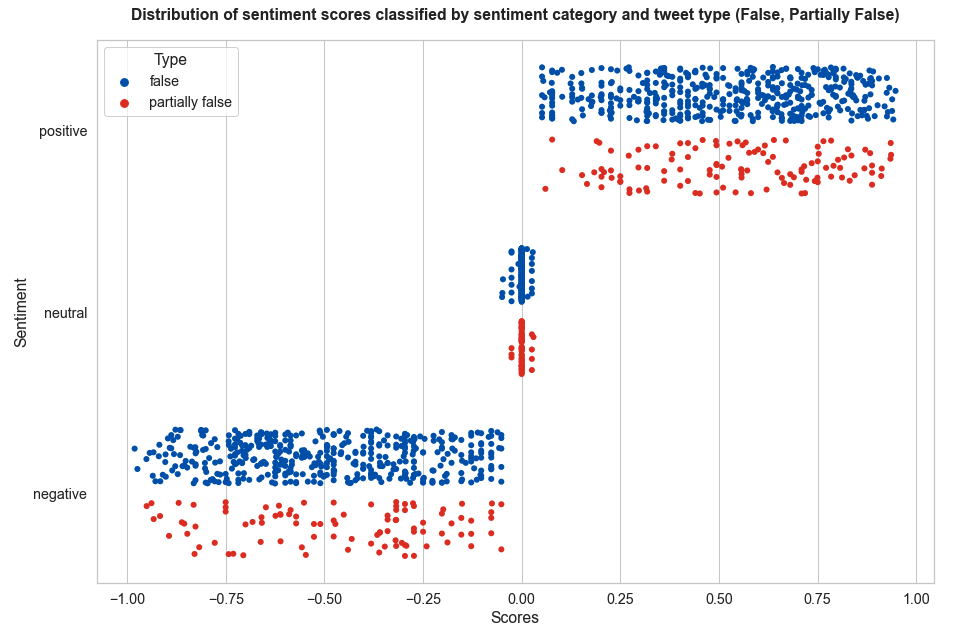

As we can see from the chart the score values are covering pretty much all the values for each category

### Frequency of positive, neutral, negative tweets classified by their category (false, partially false)

In [ ]:
positivefalse = 0
positivepfalse = 0
neutralfalse = 0
neutralpfalse = 0
negativefalse = 0
negativepfalse = 0

index=0

for element in data2:
    token_id = data2[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    data2[index]['full_text'] = remove_urls(data2[index]['full_text'])
    data2[index]['full_text'] = remove_twitter_urls(data2[index]['full_text'])
    data2[index]['full_text'] = noamp(data2[index]['full_text'])                  # No amp with space
    data2[index]['full_text'] = re.sub("^RT ", " ", data2[index]['full_text'])    # No RT
    
    tweet_list.append(data2[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data2[index]['full_text'])
    
    if lista_unica_csv[indice_csv+1].lower() == "false":
        if score['compound']>0.05:
            positivefalse = positivefalse + 1
        elif score['compound']<-0.05:
            negativefalse = negativefalse + 1
        else:
            neutralfalse = neutralfalse + 1
            
    elif lista_unica_csv[indice_csv+1].lower() == "partially false":
        if score['compound']>0.05:
            positivepfalse = positivepfalse + 1
        elif score['compound']<-0.05:
            negativepfalse = negativepfalse + 1
        else:
            neutralpfalse = neutralpfalse + 1
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

#count = [positivefalse, positivepfalse, negativefalse, negativepfalse, neutralfalse, neutralpfalse]
#tipo = ["false", "partially false","false", "partially false","false", "partially false"]
#sentiment = ["Positive", "Positive", "Negative","Negative","Neutral","Neutral"]
count = [positivefalse,negativefalse,neutralfalse, positivepfalse,negativepfalse,neutralpfalse]
tipo = ["Positive", "Negative","Neutral", "Positive", "Negative","Neutral"]
sentiment = ["False          ", "False          ", "False          ","Partially False","Partially False","Partially False"]
#          
df_fake2 = pd.DataFrame(
    {'Scores':count,
    'Type': tipo,
     'Sentiment': sentiment
    })

print(df_fake2)

count = [positivefalse,negativefalse,neutralfalse]
sentiment = ["Positive", "Negative","Neutral"]
#          
pie_fake = pd.DataFrame(
    {'Count':count,
     'Category': sentiment
    })

print(pie_fake)

count = [positivepfalse,negativepfalse,neutralpfalse]
sentiment = ["Positive", "Negative","Neutral"]
#          
pie_pfake = pd.DataFrame(
    {'Count':count,
     'Category': sentiment
    })

print(pie_pfake)

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
pie_fake_fig = px.pie(pie_fake, values='Count', names='Category',
             title='False tweets classified by sentiment - Fake Covid-19 dataset')
pie_fake_fig.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
pie_fake_fig.show()

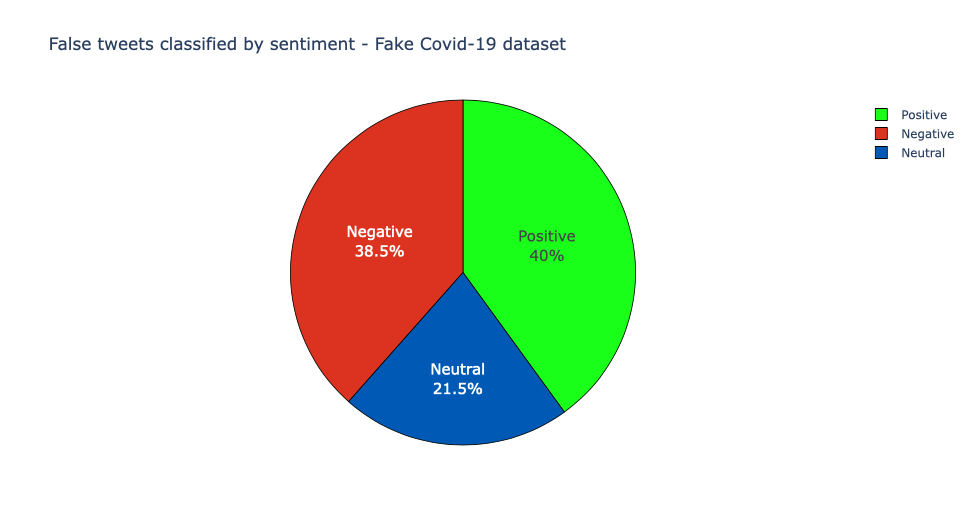

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
pie_pfake_fig = px.pie(pie_pfake, values='Count', names='Category',
             title='Partially False tweets classified by sentiment - Fake Covid-19 dataset')
pie_pfake_fig.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
pie_pfake_fig.show()

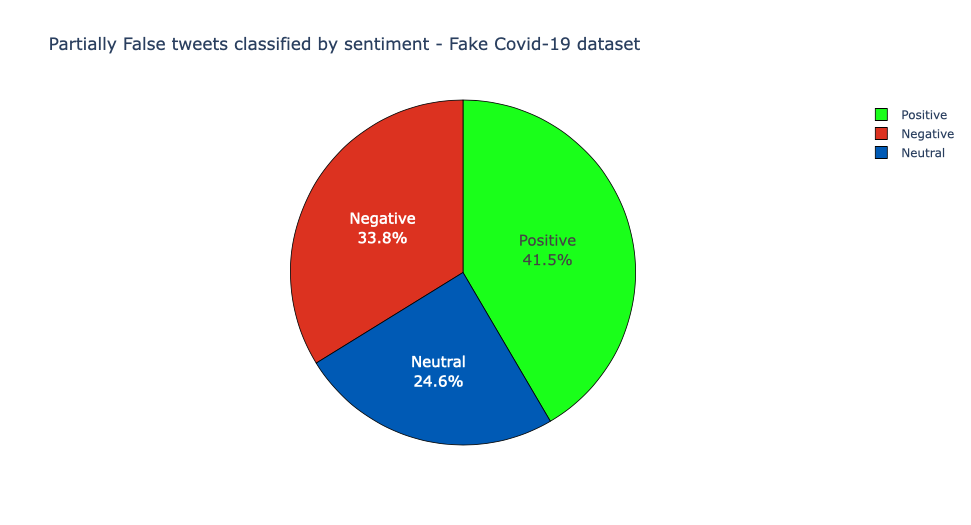

In [ ]:
range_ = ['#DC3220', '#005AB5', '#1AFF1A']
bars = alt.Chart(df_fake2).mark_bar().encode(
    x=alt.X('Scores:Q',title="Tweet count"),
    y=alt.Y('Type:N',title=None,axis=alt.Axis(labels=False)),
    color=alt.Color('Type:N', scale=alt.Scale(range=range_),title="Sentiment Type"),
    row= alt.Row('Sentiment:N',title=None),#title=None ,header=alt.Header(labelOrient="left",labelAngle=0,labelPadding=0)
    tooltip=[
        alt.Tooltip('Sentiment:N', title='Category'),
        alt.Tooltip('Type:N', title='Sentiment Type'),
        alt.Tooltip('Scores:Q', title='Tweet Count')
    ]
).properties(
    title="Frequency of positive, neutral and negative tweets classified by category (False, Partially False)", 
    width=950,
    height=100
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
).configure_header(
    titleFontSize=15,
    labelFontSize=14,
    titleAngle=0,
    labelAngle=0,
    labelPadding=10, 
    labelAlign='left'
)
bars


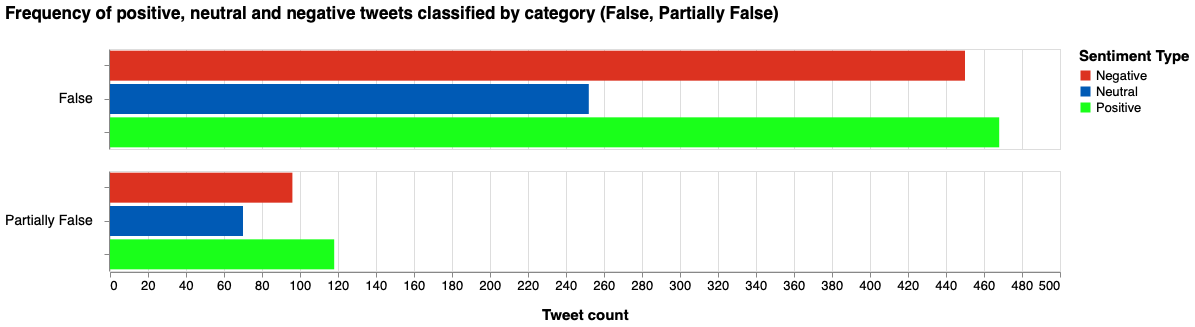

### Heatmap AVERAGE sentiment score per day (false tweets only)

In [ ]:


index=0
values = {}
#start = datetime.datetime.strptime("2020/01/01", "%Y/%m/%d")
#end = datetime.datetime.strptime("2020/09/01", "%Y/%m/%d")
#date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

dates = []

for el in data3:
    token_id = data3[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    if lista_unica_csv[indice_csv+1].lower() == "false":
        token=data3[index]['created_at']
        d = parse(token)
        datadic = d.strftime("%Y/%m/%d")
        dates.append(datadic)
        values[datadic] = {
            "score" : 0,
            "count" : 0
        }
    index = index + 1

    
index = 0

for element in data3:
    token_id = data3[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    
    data3[index]['full_text'] = remove_urls(data3[index]['full_text'])
    data3[index]['full_text'] = remove_twitter_urls(data3[index]['full_text'])
    data3[index]['full_text'] = noamp(data3[index]['full_text'])                  # No amp with space
    data3[index]['full_text'] = re.sub("^RT ", " ", data3[index]['full_text'])    # No RT
    
    score = SentimentIntensityAnalyzer().polarity_scores(data3[index]['full_text'])
    
    if lista_unica_csv[indice_csv+1].lower() == "false":
        token=data3[index]['created_at']
        d = parse(token)
        d = d.strftime('%Y/%m/%d')
        
        values[d]['score'] = values[d]['score'] + score['compound']
        values[d]['count'] = values[d]['count'] + 1
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
 
            
dfa = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfa = dfa.rename(columns={'index':'data'})
#print(dfa)

chartdue = alt.Chart(
    dfa,
    title="Heatmap AVERAGE sentiment score per day (false tweets only)"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textdue = chartdue.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.4, 0.4]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartdue + textdue).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

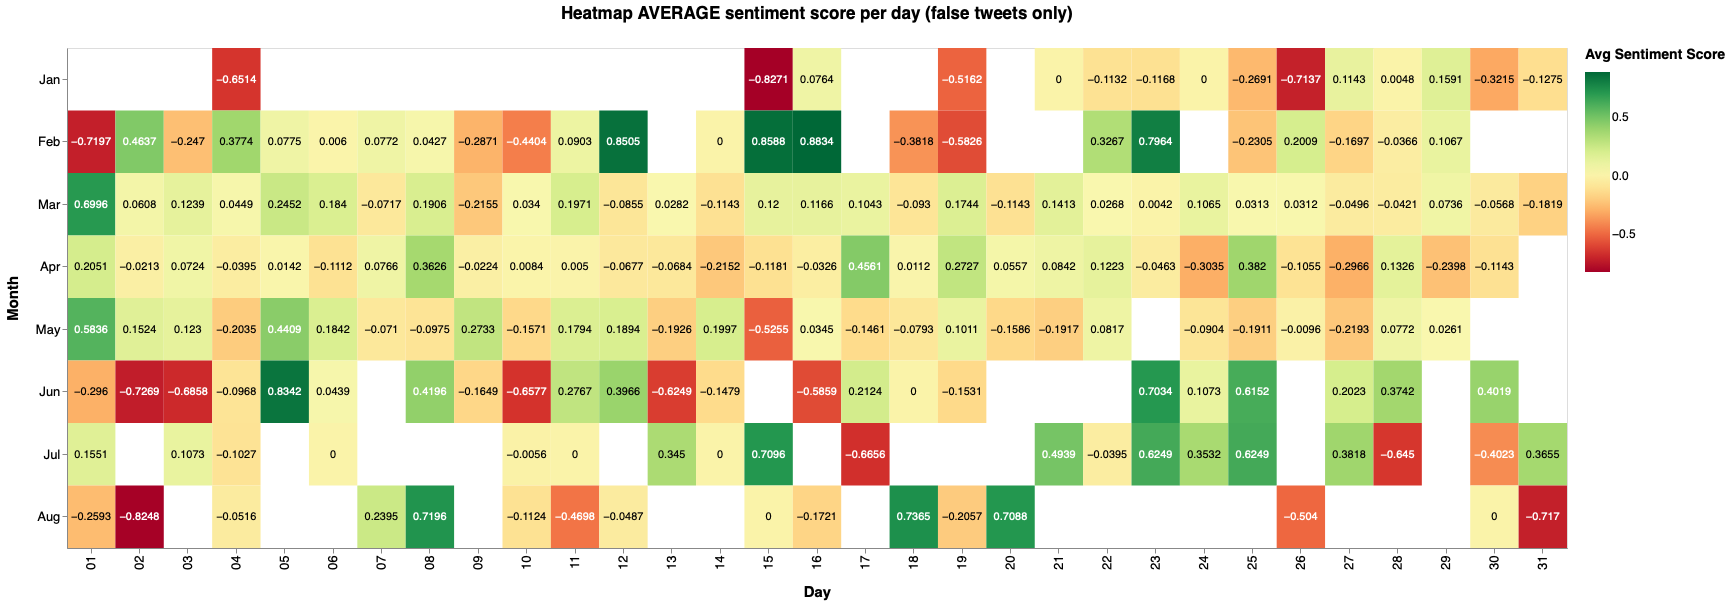

### Heatmap AVERAGE sentiment score per day (partially false tweets only)

In [ ]:


index=0
values = {}
#start = datetime.datetime.strptime("2020/01/01", "%Y/%m/%d")
#end = datetime.datetime.strptime("2020/09/01", "%Y/%m/%d")
#date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

dates = []

for el in data4:
    token_id = data4[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    if lista_unica_csv[indice_csv+1].lower() == "partially false":
        token=data4[index]['created_at']
        d = parse(token)
        datadic = d.strftime("%Y/%m/%d")
        dates.append(datadic)
        values[datadic] = {
            "score" : 0,
            "count" : 0
        }
    index = index + 1

    
index = 0

for element in data4:
    token_id = data4[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    
    data4[index]['full_text'] = remove_urls(data4[index]['full_text'])
    data4[index]['full_text'] = remove_twitter_urls(data4[index]['full_text'])
    data4[index]['full_text'] = noamp(data4[index]['full_text'])                  # No amp with space
    data4[index]['full_text'] = re.sub("^RT ", " ", data4[index]['full_text'])    # No RT
    
    score = SentimentIntensityAnalyzer().polarity_scores(data4[index]['full_text'])
    
    if lista_unica_csv[indice_csv+1].lower() == "partially false":
        token=data4[index]['created_at']
        d = parse(token)
        d = d.strftime('%Y/%m/%d')
        
        values[d]['score'] = values[d]['score'] + score['compound']
        values[d]['count'] = values[d]['count'] + 1
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
        #else:
        #    values[date.strftime("%Y/%m/%d")].pop('score')
        #    values[date.strftime("%Y/%m/%d")].pop('count')
        #    values[date.strftime("%Y/%m/%d")]['media'] = 0
        
            
dfb = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfb = dfb.rename(columns={'index':'data'})
#print(dfa)

chartdueb = alt.Chart(
    dfb,
    title="Heatmap AVERAGE sentiment score per day (partially false tweets only)"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textdueb = chartdueb.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.4, 0.4]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartdueb + textdueb).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

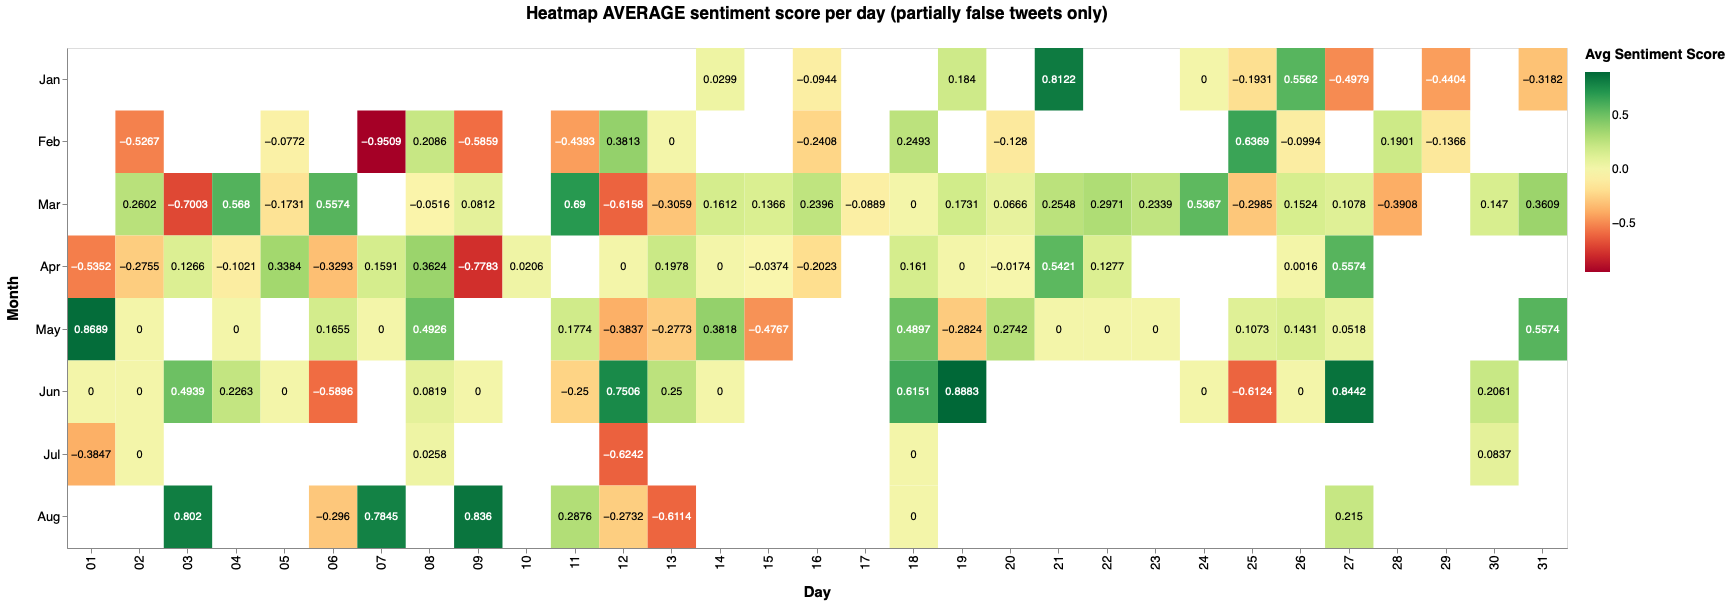

### Heatmap AVERAGE sentiment score per day (all tweets)

In [ ]:
index=0
values = {}
#dates = []

for el in data5:
    token=data5[index]['created_at']
    d = parse(token)
    datadic = d.strftime("%Y/%m/%d")
        #dates.append(datadic)
    values[datadic] = {
        "score" : 0,
        "count" : 0
    }
    index = index + 1

    
index = 0

for element in data5:  
    data5[index]['full_text'] = remove_urls(data5[index]['full_text'])
    data5[index]['full_text'] = remove_twitter_urls(data5[index]['full_text'])
    data5[index]['full_text'] = noamp(data5[index]['full_text'])                  # No amp with space
    data5[index]['full_text'] = re.sub("^RT ", " ", data5[index]['full_text'])    # No RT
    
    score = SentimentIntensityAnalyzer().polarity_scores(data5[index]['full_text'])
    token=data5[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
        
    values[d]['score'] = values[d]['score'] + score['compound']
    values[d]['count'] = values[d]['count'] + 1
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
        #else:
        #    values[date.strftime("%Y/%m/%d")].pop('score')
        #    values[date.strftime("%Y/%m/%d")].pop('count')
        #    values[date.strftime("%Y/%m/%d")]['media'] = 0
        
            
dfc = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfc = dfc.rename(columns={'index':'data'})
#print(dfa)

chartduec = alt.Chart(
    dfc,
    title="Heatmap AVERAGE sentiment score per day"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textduec = chartduec.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.4, 0.4]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartduec + textduec).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

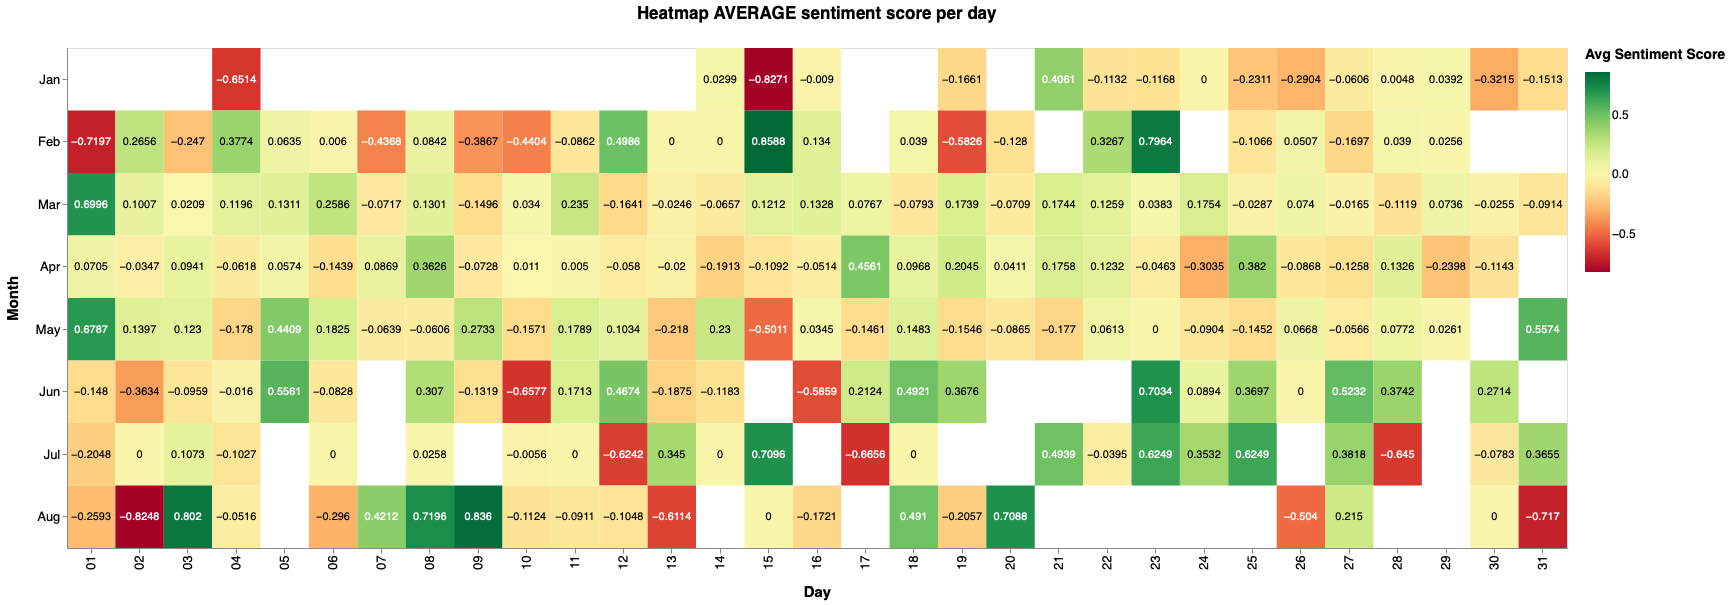

### Distribution of Covid-19 hashtags sentiment values classified by sentiment category and tweet type (False, Partially False)

We've selected some COVID-19 hashtags and showed the distribution of their sentiment scores: **covid19, coronavirus, covid, covid-19, covid_19, corona, coronaoutbreak**

In [ ]:
tweet_list = []
scores = []
category = []
sentiment = []

index=0

for element in data6:
    token_id = data6[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    for entity in data6[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            data6[index]['full_text'] = remove_urls(data6[index]['full_text'])
            data6[index]['full_text'] = remove_twitter_urls(data6[index]['full_text'])
            data6[index]['full_text'] = noamp(data6[index]['full_text'])                  # No amp with space
            data6[index]['full_text'] = re.sub("^RT ", " ", data6[index]['full_text'])    # No RT
            score = SentimentIntensityAnalyzer().polarity_scores(data6[index]['full_text'])

            if lista_unica_csv[indice_csv+1].lower() == "false":
                if score['compound']>0.05:
                    scores.append(score['compound'])
                    category.append("false")
                    sentiment.append("positive")
                elif score['compound']<-0.05:
                    scores.append(score['compound'])
                    category.append("false")
                    sentiment.append("negative")
                else:
                    scores.append(score['compound'])
                    category.append("false")
                    sentiment.append("neutral")

            elif lista_unica_csv[indice_csv+1].lower() == "partially false":
                if score['compound']>0.05:
                    scores.append(score['compound'])
                    category.append("partially false")
                    sentiment.append("positive")
                elif score['compound']<-0.05:
                    scores.append(score['compound'])
                    category.append("partially false")
                    sentiment.append("negative")
                else:
                    scores.append(score['compound'])
                    category.append("partially false")
                    sentiment.append("neutral")
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.


df_covid = pd.DataFrame(
    {'Scores':scores,
    'Type': category,
     'Sentiment': sentiment
    })

In [ ]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['axes.titlepad'] = 20 

sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

p = sns.stripplot(data=df_covid,
                    x='Scores',
                    y='Sentiment',
                    hue='Type',
                    jitter=0.30,
                    dodge=True,
                    orient='h',
                    size=6,
                 palette=["#005AB5","#DC3220"]).set_title('Distribution of covid19 hashtags sentiment scores classified by sentiment category and tweet type (False, Partially False)', weight='bold')

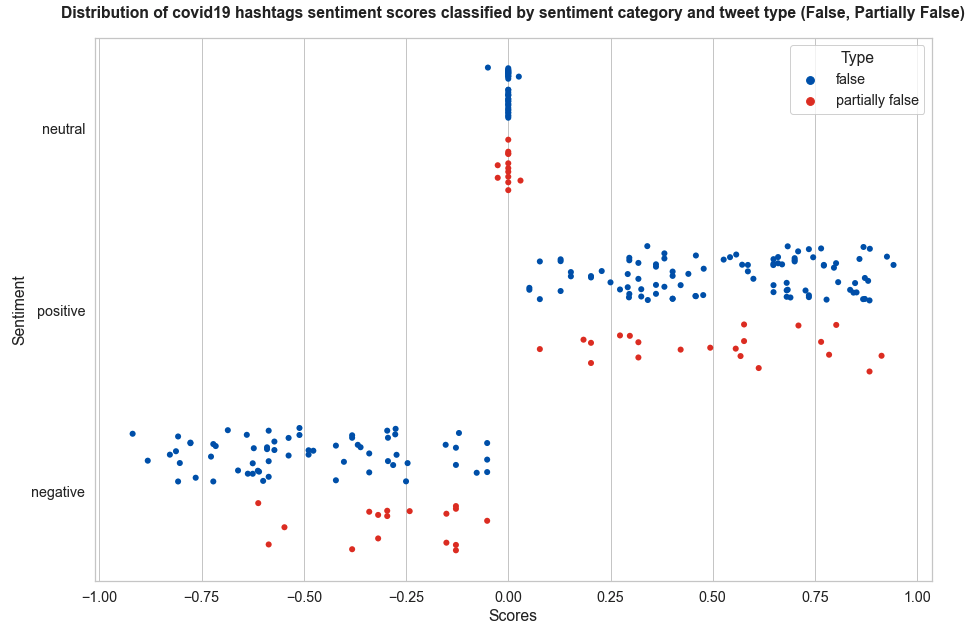

### Frequency of positive, neutral, negative tweets with covid hashtags classified by their category (false, partially false)

In [ ]:
positivefalse = 0
positivepfalse = 0
neutralfalse = 0
neutralpfalse = 0
negativefalse = 0
negativepfalse = 0

pos = 0
neu = 0
neg = 0

index=0

for element in data7:
    token_id = data7[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    for entity in data7[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            data7[index]['full_text'] = remove_urls(data7[index]['full_text'])
            data7[index]['full_text'] = remove_twitter_urls(data7[index]['full_text'])
            data7[index]['full_text'] = noamp(data7[index]['full_text'])                  # No amp with space
            data7[index]['full_text'] = re.sub("^RT ", " ", data7[index]['full_text'])    # No RT
    
            tweet_list.append(data7[index]['full_text'])
            score = SentimentIntensityAnalyzer().polarity_scores(data7[index]['full_text'])
            if score['compound']>0.05:
                pos = pos + 1
            elif score['compound']<-0.05:
                neg = neg + 1
            else:
                neu = neu + 1

            if lista_unica_csv[indice_csv+1].lower() == "false":
                if score['compound']>0.05:
                    positivefalse = positivefalse + 1
                elif score['compound']<-0.05:
                    negativefalse = negativefalse + 1
                else:
                    neutralfalse = neutralfalse + 1

            elif lista_unica_csv[indice_csv+1].lower() == "partially false":
                if score['compound']>0.05:
                    positivepfalse = positivepfalse + 1
                elif score['compound']<-0.05:
                    negativepfalse = negativepfalse + 1
                else:
                    neutralpfalse = neutralpfalse + 1

            #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

#count = [positivefalse, positivepfalse, negativefalse, negativepfalse, neutralfalse, neutralpfalse]
#tipo = ["false", "partially false","false", "partially false","false", "partially false"]
#sentiment = ["Positive", "Positive", "Negative","Negative","Neutral","Neutral"]
count = [positivefalse,negativefalse,neutralfalse, positivepfalse,negativepfalse,neutralpfalse]
tipo = ["Positive", "Negative","Neutral", "Positive", "Negative","Neutral"]
sentiment = ["False", "False", "False","Partially False","Partially False","Partially False"]
df_hash_1 = pd.DataFrame(
    {'Scores':count,
    'Type': tipo,
     'Sentiment': sentiment
    })

print(df_hash_1)

count = [pos,neg,neu]
sentiment = ["Positive", "Negative","Neutral"]
#          
pie_hash = pd.DataFrame(
    {'Count':count,
     'Category': sentiment
    })

print(pie_hash)

count = [positivefalse,negativefalse,neutralfalse]
sentiment = ["Positive", "Negative","Neutral"]
#          
pie_fake_hash = pd.DataFrame(
    {'Count':count,
     'Category': sentiment
    })

print(pie_fake_hash)

count = [positivepfalse,negativepfalse,neutralpfalse]
sentiment = ["Positive", "Negative","Neutral"]
#          
pie_pfake_hash = pd.DataFrame(
    {'Count':count,
     'Category': sentiment
    })

print(pie_pfake_hash)

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
pie_fig_hash = px.pie(pie_hash, values='Count', names='Category',
             title='Tweets with covid19 hashtags classified by sentiment - Fake Covid-19 dataset')
pie_fig_hash.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
pie_fig_hash.show()

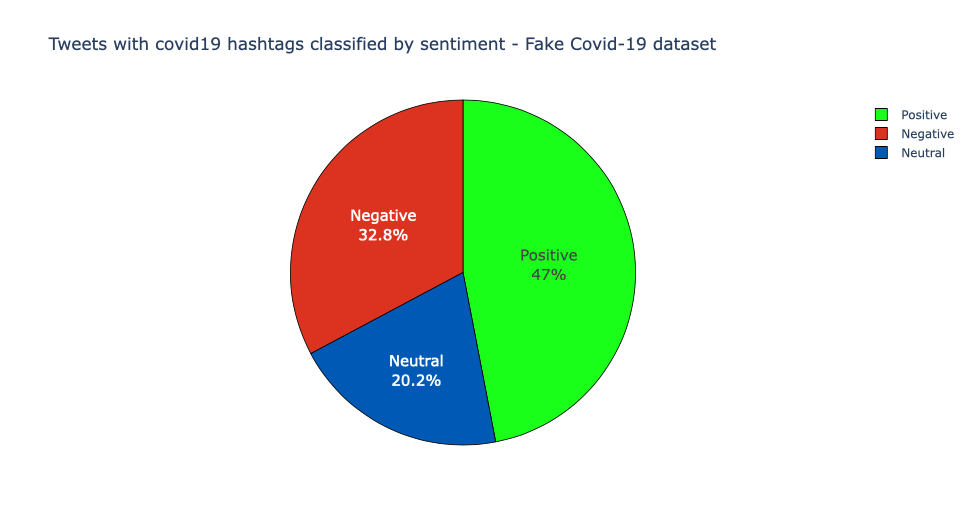

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
pie_fake_fig_hash = px.pie(pie_fake_hash, values='Count', names='Category',
             title='False tweets with covid19 hashtags classified by sentiment - Fake Covid-19 dataset')
pie_fake_fig_hash.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
pie_fake_fig_hash.show()

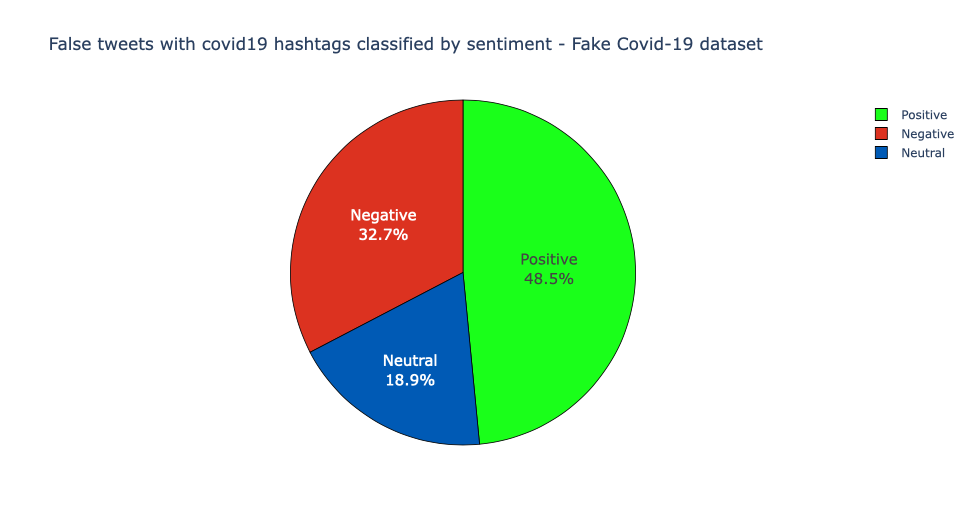

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
pie_pfake_fig_hash = px.pie(pie_pfake_hash, values='Count', names='Category',
             title='Partially False tweets with covid19 hashtags classified by sentiment - Fake Covid-19 dataset')
pie_pfake_fig_hash.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
pie_pfake_fig_hash.show()

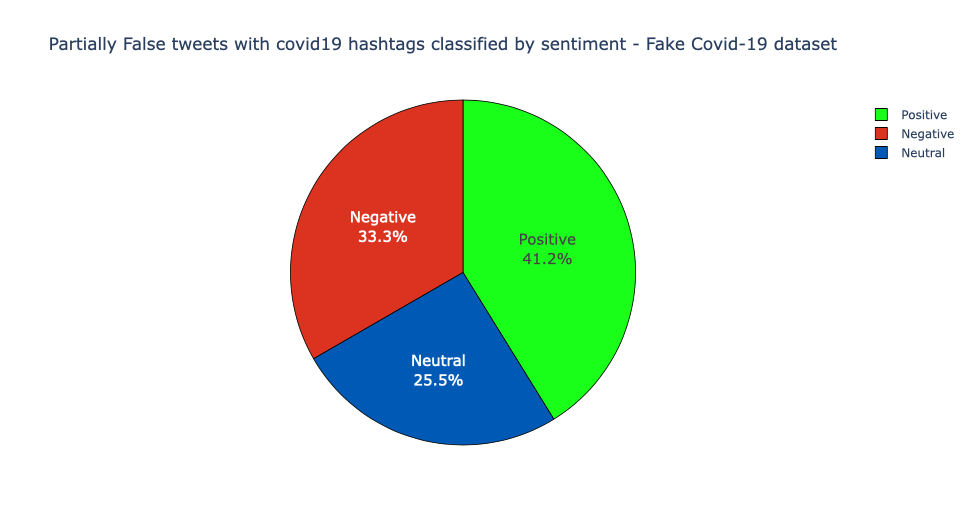

In [ ]:
range_ = ['#DC3220', '#005AB5', '#1AFF1A']
bars = alt.Chart(df_hash_1).mark_bar().encode(
    x=alt.X('Scores:Q',title="Tweet count"),
    y=alt.Y('Type:N',title=None,axis=alt.Axis(labels=False)),
    color=alt.Color('Type:N', scale=alt.Scale(range=range_),title="Sentiment Type"),
    row= alt.Row('Sentiment:N', title=None),
    tooltip=[
        alt.Tooltip('Sentiment:N', title='Category'),
        alt.Tooltip('Type:N', title='Sentiment Type'),
        alt.Tooltip('Scores:Q', title='Tweet Count')
    ]
).properties(
    title="Frequency of positive, neutral and negative tweets with covid19 hashtags classified by category (False, Partially False)", 
   width=950,
    height=100
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=14,
    labelFontSize=12,
).configure_header(
    titleFontSize=15,
    labelFontSize=14,
    titleAngle=0,
    labelAngle=0,
    labelPadding=10, 
    labelAlign='left'
)
bars

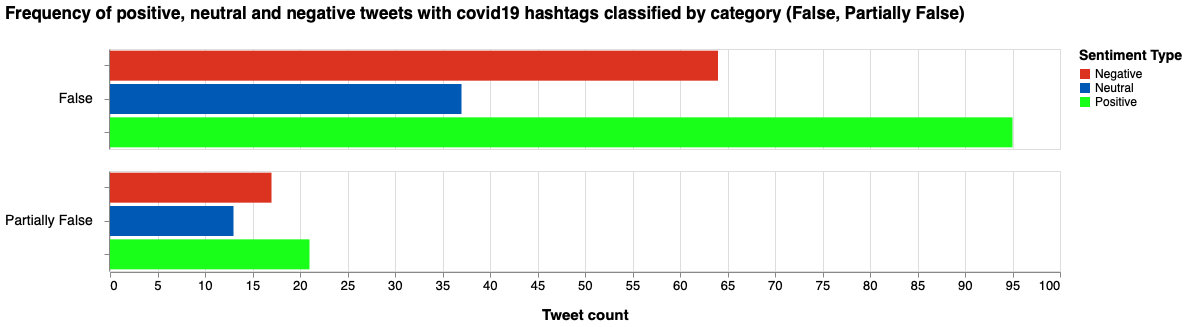

### Heatmap AVERAGE sentiment score per day (false tweets with Covid-19 hashtags)

In [ ]:
index=0
values = {}
#dates = []

for el in data11:
    token_id = data11[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    if lista_unica_csv[indice_csv+1].lower() == "false":
        for entity in data11[index]['entities']['hashtags']:
            if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
                token=data11[index]['created_at']
                d = parse(token)
                datadic = d.strftime("%Y/%m/%d")
                values[datadic] = {
                    "score" : 0,
                    "count" : 0
                }
    index = index + 1

    
index = 0

for element in data11:
    token_id = data11[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    if lista_unica_csv[indice_csv+1].lower() == "false":
        for entity in data11[index]['entities']['hashtags']:
            if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
                data11[index]['full_text'] = remove_urls(data11[index]['full_text'])
                data11[index]['full_text'] = remove_twitter_urls(data11[index]['full_text'])
                data11[index]['full_text'] = noamp(data11[index]['full_text'])                  # No amp with space
                data11[index]['full_text'] = re.sub("^RT ", " ", data11[index]['full_text'])    # No RT

                score = SentimentIntensityAnalyzer().polarity_scores(data11[index]['full_text'])
                token=data11[index]['created_at']
                d = parse(token)
                d = d.strftime('%Y/%m/%d')

                values[d]['score'] = values[d]['score'] + score['compound']
                values[d]['count'] = values[d]['count'] + 1
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
        #else:
        #    values[date.strftime("%Y/%m/%d")].pop('score')
        #    values[date.strftime("%Y/%m/%d")].pop('count')
        #    values[date.strftime("%Y/%m/%d")]['media'] = 0
        
            
dfcovidf = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfcovidf = dfcovidf.rename(columns={'index':'data'})
#print(dfa)

chartcovf = alt.Chart(
    dfcovidf,
    title="Heatmap AVERAGE sentiment score per day (false tweets with Covid-19 hashtags)"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textcovf = chartcovf.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.4, 0.4]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartcovf + textcovf).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

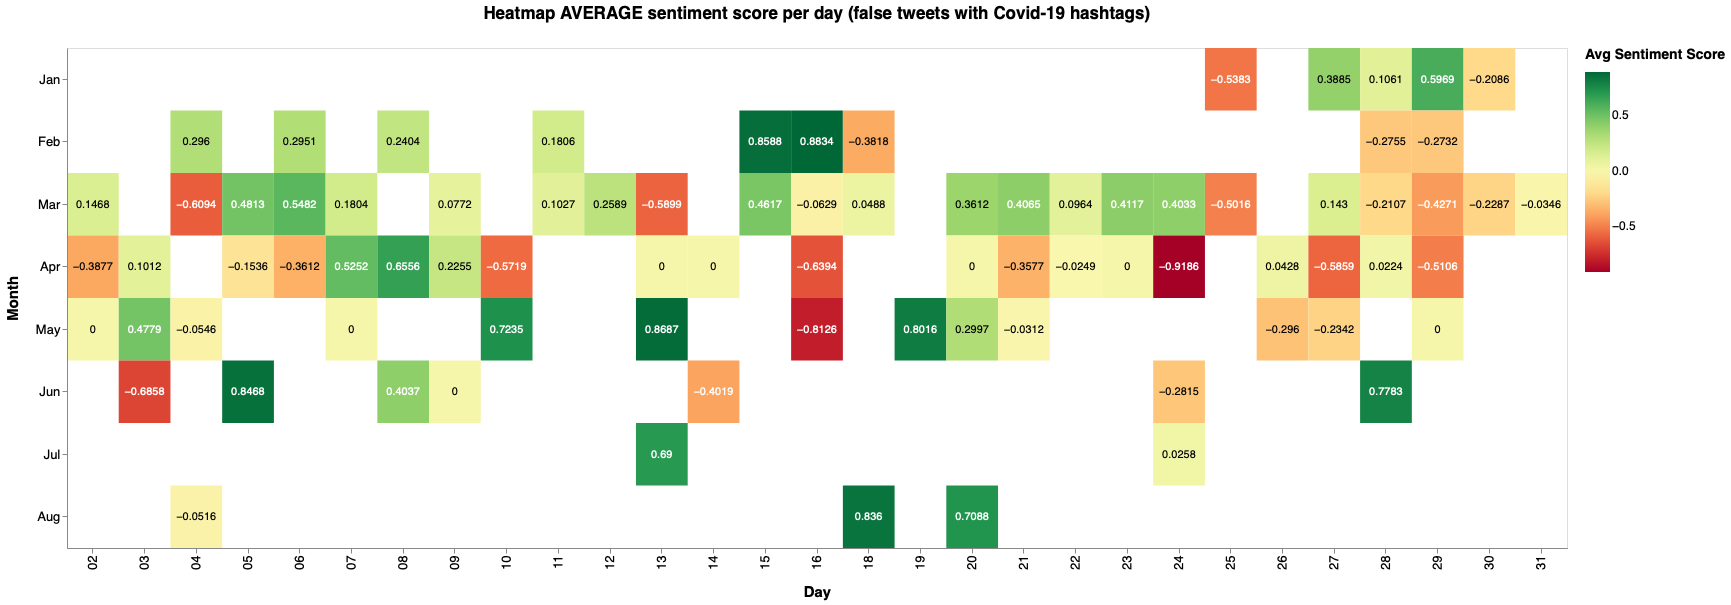

### Heatmap AVERAGE sentiment score per day (partially false tweets with Covid-19 hashtags)

In [ ]:
index=0
values = {}
#dates = []

for el in data10:
    token_id = data10[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    if lista_unica_csv[indice_csv+1].lower() == "partially false":
        for entity in data10[index]['entities']['hashtags']:
            if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
                token=data10[index]['created_at']
                d = parse(token)
                datadic = d.strftime("%Y/%m/%d")
                values[datadic] = {
                    "score" : 0,
                    "count" : 0
                }
    index = index + 1

    
index = 0

for element in data10:
    token_id = data10[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    if lista_unica_csv[indice_csv+1].lower() == "partially false":
        for entity in data10[index]['entities']['hashtags']:
            if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
                data10[index]['full_text'] = remove_urls(data10[index]['full_text'])
                data10[index]['full_text'] = remove_twitter_urls(data10[index]['full_text'])
                data10[index]['full_text'] = noamp(data10[index]['full_text'])                  # No amp with space
                data10[index]['full_text'] = re.sub("^RT ", " ", data10[index]['full_text'])    # No RT

                score = SentimentIntensityAnalyzer().polarity_scores(data10[index]['full_text'])
                token=data10[index]['created_at']
                d = parse(token)
                d = d.strftime('%Y/%m/%d')

                values[d]['score'] = values[d]['score'] + score['compound']
                values[d]['count'] = values[d]['count'] + 1
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
        #else:
        #    values[date.strftime("%Y/%m/%d")].pop('score')
        #    values[date.strftime("%Y/%m/%d")].pop('count')
        #    values[date.strftime("%Y/%m/%d")]['media'] = 0
        
            
dfcovidp = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfcovidp = dfcovidp.rename(columns={'index':'data'})
#print(dfa)

chartcovp = alt.Chart(
    dfcovidp,
    title="Heatmap AVERAGE sentiment score per day (partially false tweets with Covid-19 hashtags)"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textcovp = chartcovp.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.4, 0.4]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartcovp + textcovp).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

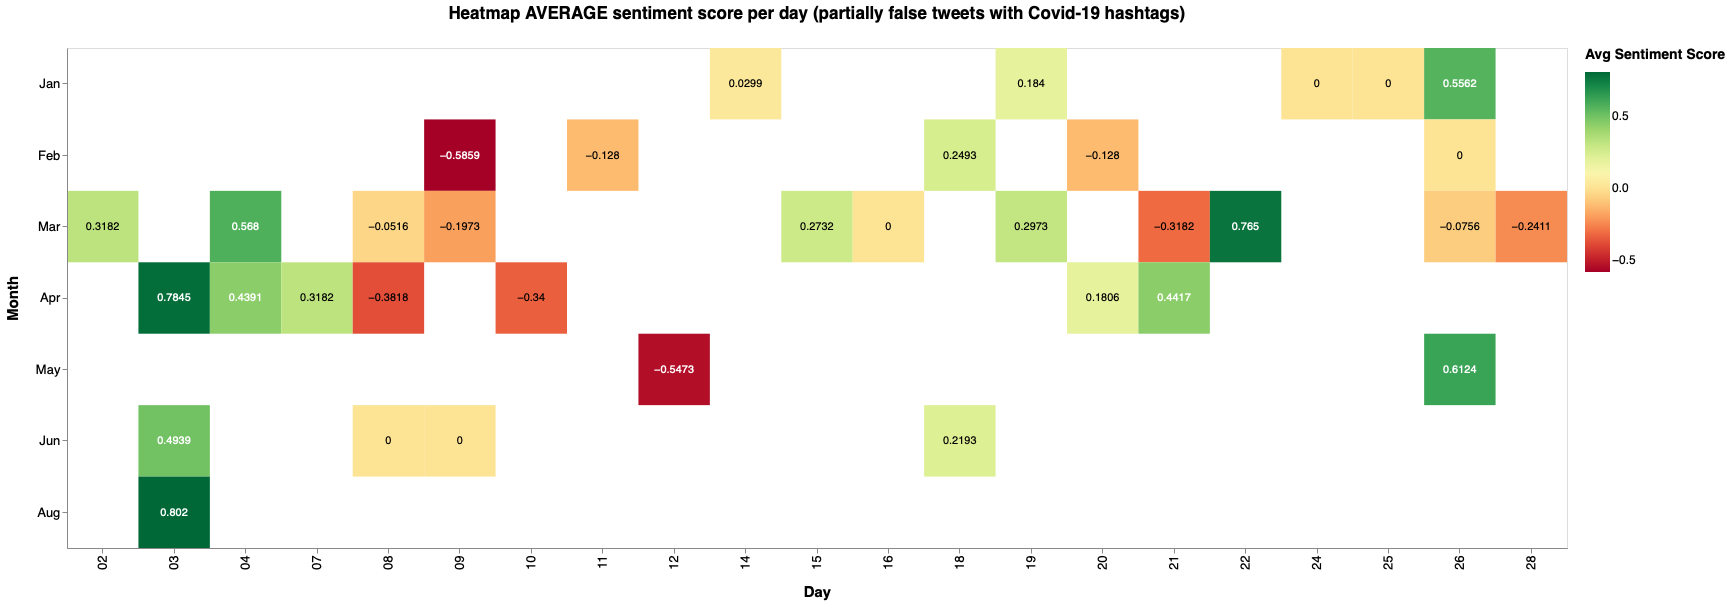

### Heatmap AVERAGE sentiment score per day (all tweets with Covid-19 hashtags)

In [ ]:
index=0
values = {}
#dates = []

for el in data9:
    for entity in data9[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            token=data9[index]['created_at']
            d = parse(token)
            datadic = d.strftime("%Y/%m/%d")
            values[datadic] = {
                "score" : 0,
                "count" : 0
            }
    index = index + 1

    
index = 0

for element in data9:  
    for entity in data9[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            data9[index]['full_text'] = remove_urls(data9[index]['full_text'])
            data9[index]['full_text'] = remove_twitter_urls(data9[index]['full_text'])
            data9[index]['full_text'] = noamp(data9[index]['full_text'])                  # No amp with space
            data9[index]['full_text'] = re.sub("^RT ", " ", data9[index]['full_text'])    # No RT

            score = SentimentIntensityAnalyzer().polarity_scores(data9[index]['full_text'])
            token=data9[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')

            values[d]['score'] = values[d]['score'] + score['compound']
            values[d]['count'] = values[d]['count'] + 1
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
        #else:
        #    values[date.strftime("%Y/%m/%d")].pop('score')
        #    values[date.strftime("%Y/%m/%d")].pop('count')
        #    values[date.strftime("%Y/%m/%d")]['media'] = 0
        
            
dfcovidall = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfcovidall = dfcovidall.rename(columns={'index':'data'})
#print(dfa)

chartcovall = alt.Chart(
    dfcovidall,
    title="Heatmap AVERAGE sentiment score per day (all tweets with Covid-19 hashtags)"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textcovall = chartcovall.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.4, 0.4]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartcovall + textcovall).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

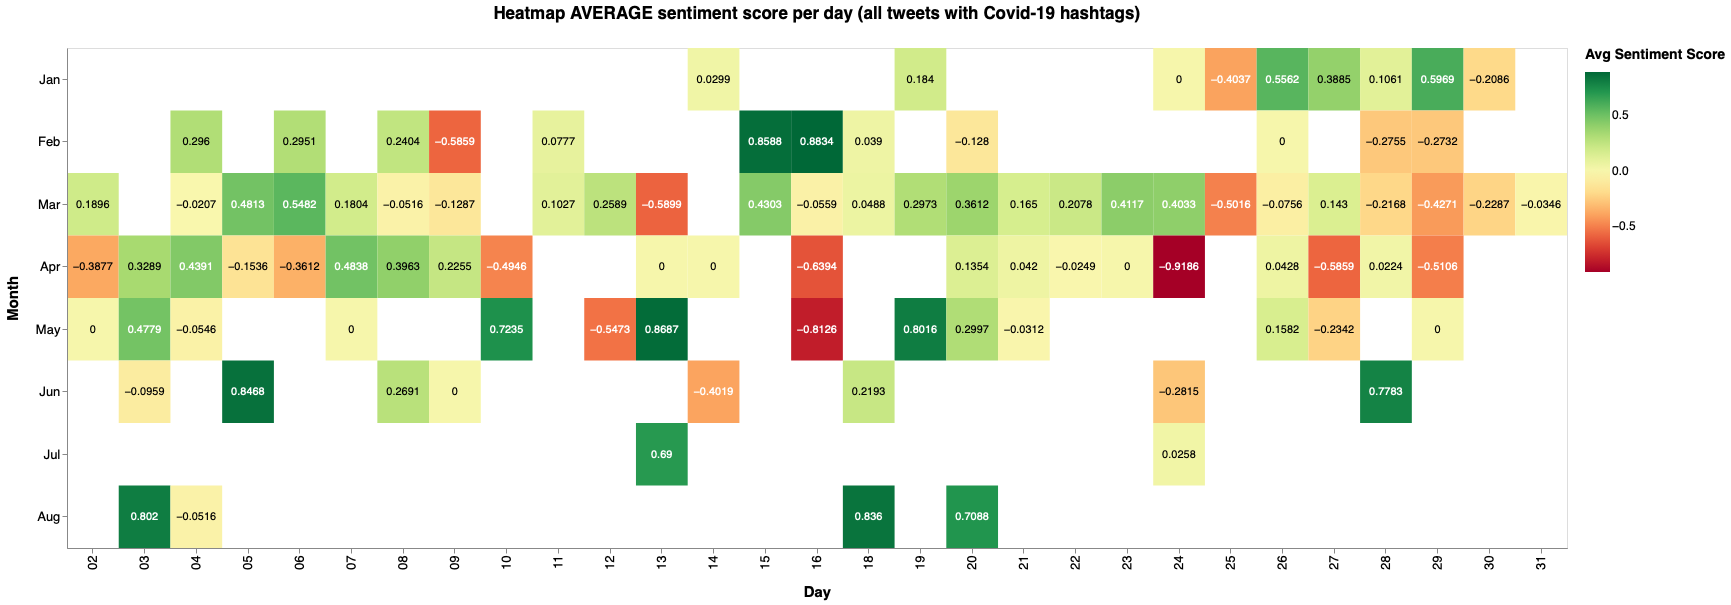